![title](https://segundoasegundo.com/wp-content/uploads/2019/03/Semana-Santa-850x370.png)

# <center> Conociendo la oferta gastronómica y turística de la ciudad de Guadalajara: un práctico caso de Data Intelligence y Machine Learning para el análisis del comportamiento social con Google Maps</center>

 <center> <a href="http://www.roqueleal.me">Roque Leal</a> </center>

En esta oportunidad vamos a realizar un estudio exploratorio de los datos de Google Maps asociados a la ciudad de Guadalajara - México, para ello se utilizará la extracción de los datos en Google Maps para descubrir datos útiles sobre los restaurantes ó de sus atracciones turísticas:nombres, tipos de negocios, clasificaciones de estrellas, información de contacto, coordenadas, horarios más frecuentados, etc.

Todos estos datos se pueden utilizar para obtener muchos conocimientos sobre el negocio / ubicación y sus entornos circundantes, para ello comencemos este paseo con algo de lo más típico de Guadalajara: su gastronómia y sus atracciones turísticas para descubrir interesantes Geoinsights de los restaurantes, mejorar la experiencia de los clientes, conocer su comportamiento y responder a nuestra curiosidad de conocer lo mejor que la ciudad nos ofrece de una manera inteligente con BigData y Data Science.

## Librerias Python

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementNotInteractableException, ElementClickInterceptedException
from tqdm import tqdm_notebook as tqdmn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import time, re

In [12]:
resto.shape

(176, 12)

In [2]:
resto = pd.read_csv('gdl_resto.csv')

In [3]:
resto.head()

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude
0,TACOS GAY,4.0,(251),Mexican restaurant,$,"MMF2+35 Guadalajara, Jalisco, Mexico",NaN,NaN,"['wealth\n13', 'kindness\n7', 'supper\n6', 'ev...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.672726,-103.349527
1,Tortas Ahogadas Moy,4.9,(54),Mexican restaurant,NaN,"MMF3+7Q Guadalajara, Jalisco, Mexico",NaN,NaN,[],[],20.673163,-103.345601
2,Birriería las 9 Esquinas,4.4,"(6,434)",Mexican restaurant,$$,"MMC2+8G Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6260,"['birria\n1248', 'traditional\n141', 'goat\n11...","['0% busy at 6 AM.', '0% busy at 7 AM.', '16% ...",20.670800,-103.348681
3,EL PILON DE LOS ARRIEROS,4.6,"(1,299)",Mexican restaurant,$$,"MMC2+7F Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 2799,"['birria\n183', 'cymbals\n51', 'barbacoa\n38',...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.670644,-103.348760
4,Los Dichos de la Comida Mexicana,4.4,(805),Mexican restaurant,$$,"MMF3+99 Guadalajara, Jalisco, Mexico",NaN,Claim this business,"['economy\n17', 'breakfast\n16', 'aguas fresca...","['0% busy at 6 AM.', '0% busy at 7 AM.', '21% ...",20.673388,-103.346591


In [4]:
resto.shape

(176, 12)

## Esta técnica nos permitió extraer datos de 176 restaurantes del centro de la ciudad de Guadalajara

In [5]:
resto.total_ratings = resto.total_ratings.replace('(\(|\)|,)', '', regex=True)

In [6]:
resto.total_ratings = resto.total_ratings.astype(float)

In [7]:
resto.business_category.value_counts()

Mexican restaurant              135
Taco restaurant                   8
Restaurant                        6
Bar & grill                       5
Fast food restaurant              3
Bar                               2
Down home cooking restaurant      2
Market                            2
Chicken restaurant                2
Health food restaurant            1
Takeout restaurant                1
Department store                  1
Buffet restaurant                 1
Vegan restaurant                  1
Seafood restaurant                1
Hamburger restaurant              1
Name: business_category, dtype: int64

In [8]:
resto = resto[resto.business_category.isin(['Mexican restaurant'])].copy()

In [9]:
resto.business_category.value_counts()

Mexican restaurant    135
Name: business_category, dtype: int64

## Vamos a localizar nuestra muestra de 211 restaurantes en Guadalajara

In [10]:
tileset = r'https://api.mapbox.com/styles/v1/roqueleal08/cjyaey84d07zq1crze5r08yg1/tiles/256/{z}/{x}/{y}@2x?access_token=MAPBOXAPI'
attribution = (r'Map data © <a href="http://openstreetmap.org">OpenStreetMap</a>'
                ' contributors, Imagery © <a href="http://mapbox.com">MapBox</a>')
gdl_center = [20.665072,-103.348904]
resto_map = folium.Map(location=gdl_center, zoom_start=12.5, tiles=tileset, attr=attribution)

for latitude, longitude, full_name, address, phone, website, rating, total_rating in zip(resto.latitude, resto.longitude, resto.full_name, resto.address, resto.phone, resto.website, resto.rating, resto.total_ratings):
    popup = '<strong>' + str(full_name) +  '</li><li>Rating: ' + str(rating) + ' (Total of ' + str(total_rating) + ' reviews)'
    folium.Marker( [latitude, longitude], 
                   icon=folium.CustomIcon( icon_image='https://www.pinclipart.com/picdir/big/46-460577_maps-vector-graphic-google-maps-icon-android-clipart.png', icon_size=(15,15) ), popup=popup).add_to(resto_map)
resto_map

In [11]:
from folium.plugins import HeatMap
resto_rating = resto[resto.total_ratings>400].copy()
resto_rating['count'] = 1

## Hacemos un Heatmap con los de mejor puntaje en la ciudad

In [12]:
HeatMap(data=resto_rating[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=20, max_zoom=17).add_to(resto_map)
resto_map

In [13]:
resto_rating.head().sort_values(by='total_ratings', ascending=False)

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude,count
2,Birriería las 9 Esquinas,4.4,6434.0,Mexican restaurant,$$,"MMC2+8G Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6260,"['birria\n1248', 'traditional\n141', 'goat\n11...","['0% busy at 6 AM.', '0% busy at 7 AM.', '16% ...",20.670800,-103.348681,1
6,Restaurantes La Gorda · Centro,4.2,2551.0,Mexican restaurant,$$,"MMF3+HF Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 7185,"['pozole\n80', 'cymbals\n68', 'carne en su jug...","['0% busy at 6 AM.', '0% busy at 7 AM.', '20% ...",20.673876,-103.346340,1
3,EL PILON DE LOS ARRIEROS,4.6,1299.0,Mexican restaurant,$$,"MMC2+7F Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 2799,"['birria\n183', 'cymbals\n51', 'barbacoa\n38',...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.670644,-103.348760,1
4,Los Dichos de la Comida Mexicana,4.4,805.0,Mexican restaurant,$$,"MMF3+99 Guadalajara, Jalisco, Mexico",NaN,Claim this business,"['economy\n17', 'breakfast\n16', 'aguas fresca...","['0% busy at 6 AM.', '0% busy at 7 AM.', '21% ...",20.673388,-103.346591,1
7,BIRRIERIA EL COMPADRE,4.5,432.0,Mexican restaurant,$$,"MMC2+4G Guadalajara, Jalisco, Mexico",NaN,+52 33 3614 5550,"['birria\n105', 'tortillas\n11', 'quesadilla\n...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.670254,-103.348644,1


## Ahora identificamos aquellos restaurantes que cumplan la condición de ser restaurantes de cocina tradicional de alta calidad con una buena oferta de cócteles

In [14]:
resto.business_category.value_counts()

Mexican restaurant    135
Name: business_category, dtype: int64

In [15]:
mexican = resto[resto.business_category == 'Mexican restaurant']
restaurants  = resto[(resto.business_category.str.contains('Restaurant', case=False)) & (resto.full_name.str.contains('Mexican restaurant', case=False, regex=True))]

gdl_resto = pd.concat([mexican, restaurants])

In [16]:
gdl_resto.head(1)

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude
0,TACOS GAY,4.0,251.0,Mexican restaurant,$,"MMF2+35 Guadalajara, Jalisco, Mexico",NaN,NaN,"['wealth\n13', 'kindness\n7', 'supper\n6', 'ev...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.672726,-103.349527


Aqui vemos los restaurantes que cumplen las condiciones descritas según el tópico de sus reviews, este hace referencia en las palabras claves que los usuarios reconocieron el local y atribuyeron sus reviews

Elegimos aquellos que cumplan la condición de "traditional", "coktail" y "gourmet" para asignar un valor a cada restaurante y lograr establecer un scoring según estas condiciones

In [17]:
traditional = []
for i in gdl_resto.review_topics :
    traditional.append(re.findall('\d+|$', re.findall('traditional......|$', i)[0])[0] )

gdl_resto['traditional'] = traditional

cocktail = []
for i in gdl_resto.review_topics :
    cocktail.append(re.findall('\d+|$', re.findall('cocktail......|$', i)[0])[0] )

gdl_resto['cocktail'] = cocktail

gourmet = []
for i in gdl_resto.review_topics :
    gourmet.append(re.findall('\d+|$', re.findall('gourmet......|$', i)[0])[0] )

gdl_resto['gourmet'] = gourmet

In [18]:
gdl_resto.head(20)

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude,traditional,cocktail,gourmet
0,TACOS GAY,4.0,251.0,Mexican restaurant,$,"MMF2+35 Guadalajara, Jalisco, Mexico",NaN,NaN,"['wealth\n13', 'kindness\n7', 'supper\n6', 'ev...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.672726,-103.349527,,,
1,Tortas Ahogadas Moy,4.9,54.0,Mexican restaurant,NaN,"MMF3+7Q Guadalajara, Jalisco, Mexico",NaN,NaN,[],[],20.673163,-103.345601,,,
2,Birriería las 9 Esquinas,4.4,6434.0,Mexican restaurant,$$,"MMC2+8G Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6260,"['birria\n1248', 'traditional\n141', 'goat\n11...","['0% busy at 6 AM.', '0% busy at 7 AM.', '16% ...",20.670800,-103.348681,141,,
3,EL PILON DE LOS ARRIEROS,4.6,1299.0,Mexican restaurant,$$,"MMC2+7F Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 2799,"['birria\n183', 'cymbals\n51', 'barbacoa\n38',...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.670644,-103.348760,22,,
4,Los Dichos de la Comida Mexicana,4.4,805.0,Mexican restaurant,$$,"MMF3+99 Guadalajara, Jalisco, Mexico",NaN,Claim this business,"['economy\n17', 'breakfast\n16', 'aguas fresca...","['0% busy at 6 AM.', '0% busy at 7 AM.', '21% ...",20.673388,-103.346591,,,
5,Tacos y Gorditas El Gallo Chuy,4.5,245.0,Mexican restaurant,NaN,"MMF3+GR Guadalajara, Jalisco, Mexico",NaN,+52 33 2385 4424,"['traditional\n16', 'steamed\n5', 'breakfast\n...",[],20.673813,-103.345490,16,,
6,Restaurantes La Gorda · Centro,4.2,2551.0,Mexican restaurant,$$,"MMF3+HF Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 7185,"['pozole\n80', 'cymbals\n68', 'carne en su jug...","['0% busy at 6 AM.', '0% busy at 7 AM.', '20% ...",20.673876,-103.346340,21,,
7,BIRRIERIA EL COMPADRE,4.5,432.0,Mexican restaurant,$$,"MMC2+4G Guadalajara, Jalisco, Mexico",NaN,+52 33 3614 5550,"['birria\n105', 'tortillas\n11', 'quesadilla\n...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.670254,-103.348644,,,
8,Tortas Ahogadas Don Albert,4.5,328.0,Mexican restaurant,$,"MJFW+4J Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6965,"['tacos\n14', 'kindness\n8', 'economy\n7', 'tr...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.672817,-103.353390,5,,
9,CARNITAS SAN FRANCISCO,4.5,288.0,Mexican restaurant,$,"MMC3+M2 Guadalajara, Jalisco, Mexico",NaN,NaN,"['tacos\n21', 'torta ahogada\n16', 'barbacoa\n...","['% busy at .', '0% busy at 6 AM.', '0% busy a...",20.671652,-103.347424,,,


In [19]:
gdl_resto.traditional = gdl_resto.traditional.replace('', 0)
gdl_resto.cocktail = gdl_resto.cocktail.replace('', 0)
gdl_resto.gourmet = gdl_resto.gourmet.replace('', 0)

In [20]:
gdl_resto.traditional = gdl_resto.traditional.astype(int)
gdl_resto.cocktail = gdl_resto.cocktail.astype(int)
gdl_resto.gourmet = gdl_resto.gourmet.astype(int)

In [21]:
gdl_resto.head(20)

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude,traditional,cocktail,gourmet
0,TACOS GAY,4.0,251.0,Mexican restaurant,$,"MMF2+35 Guadalajara, Jalisco, Mexico",NaN,NaN,"['wealth\n13', 'kindness\n7', 'supper\n6', 'ev...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.672726,-103.349527,0,0,0
1,Tortas Ahogadas Moy,4.9,54.0,Mexican restaurant,NaN,"MMF3+7Q Guadalajara, Jalisco, Mexico",NaN,NaN,[],[],20.673163,-103.345601,0,0,0
2,Birriería las 9 Esquinas,4.4,6434.0,Mexican restaurant,$$,"MMC2+8G Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6260,"['birria\n1248', 'traditional\n141', 'goat\n11...","['0% busy at 6 AM.', '0% busy at 7 AM.', '16% ...",20.670800,-103.348681,141,0,0
3,EL PILON DE LOS ARRIEROS,4.6,1299.0,Mexican restaurant,$$,"MMC2+7F Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 2799,"['birria\n183', 'cymbals\n51', 'barbacoa\n38',...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.670644,-103.348760,22,0,0
4,Los Dichos de la Comida Mexicana,4.4,805.0,Mexican restaurant,$$,"MMF3+99 Guadalajara, Jalisco, Mexico",NaN,Claim this business,"['economy\n17', 'breakfast\n16', 'aguas fresca...","['0% busy at 6 AM.', '0% busy at 7 AM.', '21% ...",20.673388,-103.346591,0,0,0
5,Tacos y Gorditas El Gallo Chuy,4.5,245.0,Mexican restaurant,NaN,"MMF3+GR Guadalajara, Jalisco, Mexico",NaN,+52 33 2385 4424,"['traditional\n16', 'steamed\n5', 'breakfast\n...",[],20.673813,-103.345490,16,0,0
6,Restaurantes La Gorda · Centro,4.2,2551.0,Mexican restaurant,$$,"MMF3+HF Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 7185,"['pozole\n80', 'cymbals\n68', 'carne en su jug...","['0% busy at 6 AM.', '0% busy at 7 AM.', '20% ...",20.673876,-103.346340,21,0,0
7,BIRRIERIA EL COMPADRE,4.5,432.0,Mexican restaurant,$$,"MMC2+4G Guadalajara, Jalisco, Mexico",NaN,+52 33 3614 5550,"['birria\n105', 'tortillas\n11', 'quesadilla\n...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.670254,-103.348644,0,0,0
8,Tortas Ahogadas Don Albert,4.5,328.0,Mexican restaurant,$,"MJFW+4J Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6965,"['tacos\n14', 'kindness\n8', 'economy\n7', 'tr...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.672817,-103.353390,5,0,0
9,CARNITAS SAN FRANCISCO,4.5,288.0,Mexican restaurant,$,"MMC3+M2 Guadalajara, Jalisco, Mexico",NaN,NaN,"['tacos\n21', 'torta ahogada\n16', 'barbacoa\n...","['% busy at .', '0% busy at 6 AM.', '0% busy a...",20.671652,-103.347424,0,0,0


In [22]:
gdl_resto['score'] = gdl_resto.traditional + gdl_resto.cocktail + gdl_resto.gourmet

In [23]:
gdl_resto[((gdl_resto.traditional != 0)|(gdl_resto.cocktail != 0)) & (gdl_resto.gourmet != 0)].sort_values(by='score', ascending=False)

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude,traditional,cocktail,gourmet,score
107,Pachuco Restaurante,4.6,752.0,Mexican restaurant,$$,"MJGH+9R Guadalajara, Jalisco, Mexico",NaN,+52 33 2153 7071,"['cymbals\n58', 'cocktails\n21', 'craft beer\n...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.675886,-103.370479,0,21,15,36
104,El Sacromonte,4.6,1217.0,Mexican restaurant,$$,"MJGM+7H Guadalajara, Jalisco, Mexico",NaN,+52 33 3825 5447,"['chiles en nogada\n70', 'cymbals\n59', 'piano...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.675737,-103.366085,10,0,11,21
126,"Xokol tortilleria, molino & antojeria",4.6,213.0,Mexican restaurant,NaN,"MJMM+7P Guadalajara, Jalisco, Mexico",NaN,NaN,"['cymbals\n21', 'corn\n19', 'concept\n10', 'cu...","['% busy at .', '% busy at .', '0% busy at 6 A...",20.683140,-103.365678,7,0,8,15


## Ahora tenemos tres restaurantes que cumplen esta condición el Restaurante Pachuco y El Sacromonte, sin embargo vamos a expandir más la oferta y seleccionar además aquellos que ofrecen una buena calidad a un precio asequible

In [24]:
gdl_resto.price_range = gdl_resto.price_range.replace({'$$':'Affordable', '$$$':'Pricy' })

In [25]:
resto_best = gdl_resto.head(30).sort_values(by='score', ascending=False)

In [26]:
resto_best.head()

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude,traditional,cocktail,gourmet,score
2,Birriería las 9 Esquinas,4.4,6434.0,Mexican restaurant,Affordable,"MMC2+8G Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6260,"['birria\n1248', 'traditional\n141', 'goat\n11...","['0% busy at 6 AM.', '0% busy at 7 AM.', '16% ...",20.670800,-103.348681,141,0,0,141
14,La Chata,4.6,10535.0,Mexican restaurant,Affordable,"MMF3+V8 Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 0588,"['gift voucher\n260', 'pozole\n238', 'torta ah...","['0% busy at 6 AM.', '5% busy at 7 AM.', '24% ...",20.674693,-103.346653,97,0,0,97
3,EL PILON DE LOS ARRIEROS,4.6,1299.0,Mexican restaurant,Affordable,"MMC2+7F Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 2799,"['birria\n183', 'cymbals\n51', 'barbacoa\n38',...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.670644,-103.348760,22,0,0,22
6,Restaurantes La Gorda · Centro,4.2,2551.0,Mexican restaurant,Affordable,"MMF3+HF Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 7185,"['pozole\n80', 'cymbals\n68', 'carne en su jug...","['0% busy at 6 AM.', '0% busy at 7 AM.', '20% ...",20.673876,-103.346340,21,0,0,21
17,Tortas Degollado,4.2,331.0,Mexican restaurant,$,"MJ9X+4V Guadalajara, Jalisco, Mexico",NaN,+52 33 3335 2601,"['traditional\n20', 'pozole\n16', 'tostada\n15...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.667778,-103.350278,20,0,0,20


In [27]:
resto_best.shape

(30, 16)

## Esta nueva consulta nos permitió aumentar el número de restaurantes a 30, de ellos Birriería las 9 Esquinas luce el más atractivo para elegir y pasar una buena cena en la ciudad

## Vamos a localizar los mejores restaurantes de alta calidad en cocina tradicional con una buena oferta de cócteles y con precios asequibles

In [28]:
from folium.plugins import HeatMap
score = resto_best[resto_best.score>11].copy()
score['count'] = 1

In [29]:
resto_best.head()

,full_name,rating,total_ratings,business_category,price_range,address,phone,website,review_topics,hours,latitude,longitude,traditional,cocktail,gourmet,score
2,Birriería las 9 Esquinas,4.4,6434.0,Mexican restaurant,Affordable,"MMC2+8G Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 6260,"['birria\n1248', 'traditional\n141', 'goat\n11...","['0% busy at 6 AM.', '0% busy at 7 AM.', '16% ...",20.670800,-103.348681,141,0,0,141
14,La Chata,4.6,10535.0,Mexican restaurant,Affordable,"MMF3+V8 Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 0588,"['gift voucher\n260', 'pozole\n238', 'torta ah...","['0% busy at 6 AM.', '5% busy at 7 AM.', '24% ...",20.674693,-103.346653,97,0,0,97
3,EL PILON DE LOS ARRIEROS,4.6,1299.0,Mexican restaurant,Affordable,"MMC2+7F Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 2799,"['birria\n183', 'cymbals\n51', 'barbacoa\n38',...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.670644,-103.348760,22,0,0,22
6,Restaurantes La Gorda · Centro,4.2,2551.0,Mexican restaurant,Affordable,"MMF3+HF Guadalajara, Jalisco, Mexico",NaN,+52 33 3613 7185,"['pozole\n80', 'cymbals\n68', 'carne en su jug...","['0% busy at 6 AM.', '0% busy at 7 AM.', '20% ...",20.673876,-103.346340,21,0,0,21
17,Tortas Degollado,4.2,331.0,Mexican restaurant,$,"MJ9X+4V Guadalajara, Jalisco, Mexico",NaN,+52 33 3335 2601,"['traditional\n20', 'pozole\n16', 'tostada\n15...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.667778,-103.350278,20,0,0,20


In [30]:
HeatMap(data=score[['latitude', 'longitude', 'score']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=20, max_zoom=17).add_to(resto_map)
resto_map

## Conociendo el mejor momento para visitar nuestro restaurante

Gracias al análisis de la oferta gastronómica de Guadalajara logramos elegir la Birriería las 9 Esquinas y conocemos su ubicación ahora vamos a extraer los datos de Popular Times de Google Maps para conocer el mejor horario para visitarlo.

Con Google Popular Times podemos conocer en tiempo real la ocupación de un negocio, en este caso la  Birriería las 9 Esquinas, con ello es posible conocer la frecuencia de los visitantes y cuánto tiempo suelen permanecer dentro del local.

![title](https://uploads.guim.co.uk/2016/11/22/Google-Maps-live-data-crop-compressor2.gif)


## Extraemos la frecuencia de ocupacion de la Birriería las 9 Esquinas

In [31]:
str(list(resto_best[resto_best.full_name == 'Birriería las 9 Esquinas'].hours))

'["[\'0% busy at 6 AM.\', \'0% busy at 7 AM.\', \'16% busy at 8 AM.\', \'39% busy at 9 AM.\', \'68% busy at 10 AM.\', \'92% busy at 11 AM.\', \'100% busy at 12 PM.\', \'92% busy at 1 PM.\', \'84% busy at 2 PM.\', \'86% busy at 3 PM.\', \'88% busy at 4 PM.\', \'80% busy at 5 PM.\', \'59% busy at 6 PM.\', \'34% busy at 7 PM.\', \'15% busy at 8 PM.\', \'0% busy at 9 PM.\', \'0% busy at 10 PM.\', \'0% busy at 11 PM.\', \'0% busy at 6 AM.\', \'0% busy at 7 AM.\', \'13% busy at 8 AM.\', \'28% busy at 9 AM.\', \'44% busy at 10 AM.\', \'52% busy at 11 AM.\', \'48% busy at 12 PM.\', \'46% busy at 1 PM.\', \'54% busy at 2 PM.\', \'67% busy at 3 PM.\', \'69% busy at 4 PM.\', \'57% busy at 5 PM.\', \'42% busy at 6 PM.\', \'35% busy at 7 PM.\', \'29% busy at 8 PM.\', \'17% busy at 9 PM.\', \'7% busy at 10 PM.\', \'0% busy at 11 PM.\', \'0% busy at 6 AM.\', \'0% busy at 7 AM.\', \'14% busy at 8 AM.\', \'27% busy at 9 AM.\', \'39% busy at 10 AM.\', \'43% busy at 11 AM.\', \'41% busy at 12 PM.\', \'40

In [32]:
def visit_planner(place_name) :


    place_name = pd.DataFrame(index=['Domingos', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábados'], \
                              columns=['6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM','3 PM',
                                       '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])    
    

    return place_name

In [33]:
base_resto = visit_planner('Birriería las 9 Esquinas')
base_resto

,6 AM,7 AM,8 AM,9 AM,10 AM,11 AM,12 PM,1 PM,2 PM,3 PM,4 PM,5 PM,6 PM,7 PM,8 PM,9 PM,10 PM,11 PM
Domingos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Martes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miércoles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jueves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viernes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sábados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
for hour in list(base_resto):
    base_resto[hour] = re.findall('...%.{0,20} '+str(hour), str(list(resto_best[resto_best.full_name=='Birriería las 9 Esquinas'].hours)))
    base_resto[hour] = [ re.findall('\d+', str(i))[0] for i in base_resto[hour] ]
    base_resto[hour] = base_resto[hour].astype(int)

In [35]:
base_resto

,6 AM,7 AM,8 AM,9 AM,10 AM,11 AM,12 PM,1 PM,2 PM,3 PM,4 PM,5 PM,6 PM,7 PM,8 PM,9 PM,10 PM,11 PM
Domingos,0,0,16,39,68,92,100,92,84,86,88,80,59,34,15,0,0,0
Lunes,0,0,13,28,44,52,48,46,54,67,69,57,42,35,29,17,7,0
Martes,0,0,14,27,39,43,41,40,43,46,47,43,36,27,19,11,6,0
Miércoles,0,0,11,20,30,40,50,57,62,65,63,57,46,33,21,12,5,0
Jueves,0,0,12,26,41,49,48,48,57,71,77,66,49,36,28,17,7,0
Viernes,0,0,12,30,49,56,48,44,56,76,83,73,58,48,40,30,18,0
Sábados,0,0,15,44,79,94,83,73,77,85,88,80,65,47,30,17,8,0


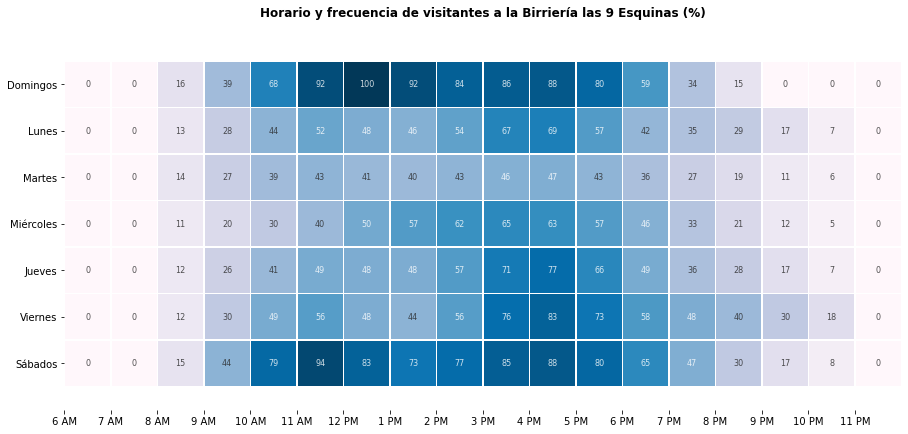

In [36]:
plt.figure(figsize=(15,7))
sns.heatmap(base_resto, cmap='PuBu', linewidths=0.8, annot=True, annot_kws={'fontsize':8, 'alpha':0.8}, fmt='d', square=True,
           cbar=False)

plt.xticks(np.arange(18), list(base_resto))
plt.title('Horario y frecuencia de visitantes a la Birriería las 9 Esquinas (%)\n', weight='semibold')

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);
plt.show()

Gracias a Popular Times de Google Maps descubrimos que la Birriería las 9 Esquinas esta abierto todos los días y basado en la frecuencia de sus visitantes pienso que es posible disfrutar de un excelente almuerzo en los días de la semana ya que los fines de semana parece estar congestionado de clientes a menos que pueda considerar ir a una cena el cual tiene una frecuencia de visitas menor que al mediodía

Como puede verse estos datos ofrecen un potencial genial para hacer análisis del comportamiento de los competidores así como tambien para conocer los patrones de los clientes no sólo al sector turístico sino a cualquier sector de comercio y servicios.

De hecho puedes ver un ejemplo de ello en uno de mis post, esta vez para Ciudad de México donde analizamos espacialmente Google Maps Popular Times <a href="http://roqueleal.me/big-data/popular-times-mexico.html">Disponible aqui</a>

# Donde se encuentran los atractivos turísticos de la ciudad de Guadalajara y cuáles son los horarios más frecuentados

![title](https://assets-fl-uploads.reservamos.mx/uploads/bg/city%3Aguadalajara/cover_desktop_uploads_2F1499977933533-c8835yqvzil-799cb6f66f348d788b37e82f1c2c02fe_2FCover-Guadalajara_2.jpg)

# Extraemos los datos de las atracciones turísticas ubicadas en el centro de la ciudad de Guadalajara y los analizamos

## Vamos analizar los datos obtenidos y encontrar el mejor horario para visitarlos

In [38]:
HL = pd.read_csv('gdl_touristes.csv')

In [57]:
HL.shape

(120, 9)

In [39]:
HL.total_ratings = HL.total_ratings.replace('\(|\)|,', '', regex=True)

In [40]:
HL.total_ratings = HL.total_ratings.astype(float)

In [41]:
HL10 = HL.sort_values(by='total_ratings', ascending=False).head(50).copy()

In [42]:
HL10.head(20)

,full_name,rating,total_ratings,landmark_category,description,address,hours,latitude,longitude
5,Mercado Libertad - San Juan de Dios,4.3,51704.0,Market,Sprawling indoor market with stalls selling fo...,"Calle Dionisio Rodríguez 52, La Perla, 44360 G...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.675439,-103.339998
3,Zoologico Guadalajara,4.7,35357.0,Zoo,"Popular zoo featuring a wide range of animals,...","Calle Paseo del Zoológico 600, Huentitán El Al...",[],20.726974,-103.308494
0,Guadalajara Cathedral,4.8,27296.0,Cathedral,This grand cathedral housing the relics of St....,"Av. Fray Antonio Alcalde 10, Zona Centro, 4410...","['0% busy at 6 AM.', '1% busy at 7 AM.', '6% b...",20.677034,-103.346984
27,Revolution Park,4.3,24581.0,Park,NaN,"Calz. del Federalismo Sur 2183, Col Americana,...",[],20.675047,-103.355879
43,Parque Metropolitano de Guadalajara,4.7,22146.0,State park,Popular city park with 100+ hectares of green ...,Avenida Beethoven Parque Metropolitano de Guad...,"['0% busy at 5 AM.', '3% busy at 6 AM.', '10% ...",20.671245,-103.438344
9,Hospicio Cabañas,4.8,15866.0,Cultural center,"This famous 18th-century complex, designed to ...","Calle Cabañas 8, Las Fresas, 44360 Guadalajara...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.676936,-103.337497
21,Basilica of Our Lady of Zapopan,4.8,14824.0,Basilica,Baroque-style Franciscan complex with an ornat...,"Calle Eva Briseño 152, Zapopan, 44250 Zapopan,...",[],20.721266,-103.392145
13,Acuario Michin,4.5,13212.0,Aquarium,NaN,"Mariano de la Bárcena 990, Zona Centro, 44200 ...",[],20.692824,-103.351358
1,Templo Expiatorio del Santísimo Sacramento,4.8,11945.0,Catholic church,Historic church with notable features includin...,"Calle Manuel López Cotilla 935, Col Americana,...",[],20.673695,-103.358967
10,Bosque Los Colomos,4.8,11851.0,National forest,"Bucolic city park with walking paths, picnic a...","El Chaco, 3200, Providencia, 44630 Guadalajara...","['0% busy at 6 AM.', '11% busy at 7 AM.', '24%...",20.708722,-103.393593


In [43]:
HL10.shape

(50, 9)

## Para este ejercicio vamos analizar de la muestra las 50 mejores atracciones turísticas que nos ofrece la ciudad

In [44]:
tourisme_map = folium.Map(location=gdl_center, zoom_start=14, tiles=tileset, attr=attribution)

for latitude, longitude, full_name, rating, total_rating in zip(HL10.latitude, HL10.longitude, HL10.full_name, HL10.rating, HL10.total_ratings):
    popup = '<strong>' + str(full_name) +  '</li><li>Rating: ' + str(rating) + ' (Total of ' + str(total_rating) + ' reviews)'
    folium.Marker( [latitude, longitude], 
                   icon=folium.CustomIcon( icon_image='https://www.pinclipart.com/picdir/big/46-460577_maps-vector-graphic-google-maps-icon-android-clipart.png', icon_size=(15,15) ), popup=popup).add_to(tourisme_map)
tourisme_map

In [45]:
tourisme_rating = HL10[HL10.total_ratings>10000].copy()
tourisme_rating['count'] = 1

## Ordenamos las mejores atracciones y localicemos los registros en un mapa de calor

In [46]:
tourisme_rating.head(50)

,full_name,rating,total_ratings,landmark_category,description,address,hours,latitude,longitude,count
5,Mercado Libertad - San Juan de Dios,4.3,51704.0,Market,Sprawling indoor market with stalls selling fo...,"Calle Dionisio Rodríguez 52, La Perla, 44360 G...","['0% busy at 6 AM.', '0% busy at 7 AM.', '4% b...",20.675439,-103.339998,1
3,Zoologico Guadalajara,4.7,35357.0,Zoo,"Popular zoo featuring a wide range of animals,...","Calle Paseo del Zoológico 600, Huentitán El Al...",[],20.726974,-103.308494,1
0,Guadalajara Cathedral,4.8,27296.0,Cathedral,This grand cathedral housing the relics of St....,"Av. Fray Antonio Alcalde 10, Zona Centro, 4410...","['0% busy at 6 AM.', '1% busy at 7 AM.', '6% b...",20.677034,-103.346984,1
27,Revolution Park,4.3,24581.0,Park,NaN,"Calz. del Federalismo Sur 2183, Col Americana,...",[],20.675047,-103.355879,1
43,Parque Metropolitano de Guadalajara,4.7,22146.0,State park,Popular city park with 100+ hectares of green ...,Avenida Beethoven Parque Metropolitano de Guad...,"['0% busy at 5 AM.', '3% busy at 6 AM.', '10% ...",20.671245,-103.438344,1
9,Hospicio Cabañas,4.8,15866.0,Cultural center,"This famous 18th-century complex, designed to ...","Calle Cabañas 8, Las Fresas, 44360 Guadalajara...","['0% busy at 6 AM.', '0% busy at 7 AM.', '0% b...",20.676936,-103.337497,1
21,Basilica of Our Lady of Zapopan,4.8,14824.0,Basilica,Baroque-style Franciscan complex with an ornat...,"Calle Eva Briseño 152, Zapopan, 44250 Zapopan,...",[],20.721266,-103.392145,1
13,Acuario Michin,4.5,13212.0,Aquarium,NaN,"Mariano de la Bárcena 990, Zona Centro, 44200 ...",[],20.692824,-103.351358,1
1,Templo Expiatorio del Santísimo Sacramento,4.8,11945.0,Catholic church,Historic church with notable features includin...,"Calle Manuel López Cotilla 935, Col Americana,...",[],20.673695,-103.358967,1
10,Bosque Los Colomos,4.8,11851.0,National forest,"Bucolic city park with walking paths, picnic a...","El Chaco, 3200, Providencia, 44630 Guadalajara...","['0% busy at 6 AM.', '11% busy at 7 AM.', '24%...",20.708722,-103.393593,1


In [47]:
from folium import plugins
from folium.plugins import HeatMap
HeatMap(data=tourisme_rating[['latitude', 'longitude', 'total_ratings']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=20, max_zoom=17).add_to(tourisme_map)
tourisme_map

## Vamos a conocer el mejor horario para visitar el Mercado Libertad de Guadalajara

In [48]:
str(list(HL10[HL10.full_name == 'Mercado Libertad - San Juan de Dios'].hours))

'["[\'0% busy at 6 AM.\', \'0% busy at 7 AM.\', \'4% busy at 8 AM.\', \'13% busy at 9 AM.\', \'30% busy at 10 AM.\', \'51% busy at 11 AM.\', \'68% busy at 12 PM.\', \'79% busy at 1 PM.\', \'83% busy at 2 PM.\', \'79% busy at 3 PM.\', \'64% busy at 4 PM.\', \'41% busy at 5 PM.\', \'20% busy at 6 PM.\', \'7% busy at 7 PM.\', \'0% busy at 8 PM.\', \'0% busy at 9 PM.\', \'0% busy at 10 PM.\', \'0% busy at 11 PM.\', \'0% busy at 6 AM.\', \'0% busy at 7 AM.\', \'4% busy at 8 AM.\', \'12% busy at 9 AM.\', \'25% busy at 10 AM.\', \'39% busy at 11 AM.\', \'49% busy at 12 PM.\', \'55% busy at 1 PM.\', \'60% busy at 2 PM.\', \'61% busy at 3 PM.\', \'57% busy at 4 PM.\', \'52% busy at 5 PM.\', \'40% busy at 6 PM.\', \'19% busy at 7 PM.\', \'0% busy at 8 PM.\', \'0% busy at 9 PM.\', \'0% busy at 10 PM.\', \'0% busy at 11 PM.\', \'0% busy at 6 AM.\', \'0% busy at 7 AM.\', \'4% busy at 8 AM.\', \'13% busy at 9 AM.\', \'25% busy at 10 AM.\', \'37% busy at 11 AM.\', \'44% busy at 12 PM.\', \'49% busy a

In [49]:
def visit_planner(place_name) :


    place_name = pd.DataFrame(index=['Domingos', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábados'], \
                              columns=['6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM','3 PM',
                                       '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])    
    

    return place_name

In [50]:
base = visit_planner('Mercado Libertad - San Juan de Dios')
base

,6 AM,7 AM,8 AM,9 AM,10 AM,11 AM,12 PM,1 PM,2 PM,3 PM,4 PM,5 PM,6 PM,7 PM,8 PM,9 PM,10 PM,11 PM
Domingos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Martes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miércoles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jueves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viernes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sábados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
for hour in list(base):
    base[hour] = re.findall('...%.{0,20} '+str(hour), str(list(HL10[HL10.full_name=='Mercado Libertad - San Juan de Dios'].hours)))
    base[hour] = [ re.findall('\d+', str(i))[0] for i in base[hour] ]
    base[hour] = base[hour].astype(int)

In [52]:
base

,6 AM,7 AM,8 AM,9 AM,10 AM,11 AM,12 PM,1 PM,2 PM,3 PM,4 PM,5 PM,6 PM,7 PM,8 PM,9 PM,10 PM,11 PM
Domingos,0,0,4,13,30,51,68,79,83,79,64,41,20,7,0,0,0,0
Lunes,0,0,4,12,25,39,49,55,60,61,57,52,40,19,0,0,0,0
Martes,0,0,4,13,25,37,44,49,54,53,49,42,30,14,0,0,0,0
Miércoles,0,0,4,10,20,30,39,43,46,47,45,38,28,16,0,0,0,0
Jueves,0,0,5,12,24,37,47,53,58,60,58,50,37,21,0,0,0,0
Viernes,0,0,6,15,28,43,53,59,63,66,65,56,40,24,0,0,0,0
Sábados,0,0,6,18,36,55,72,86,96,100,96,81,57,32,0,0,0,0


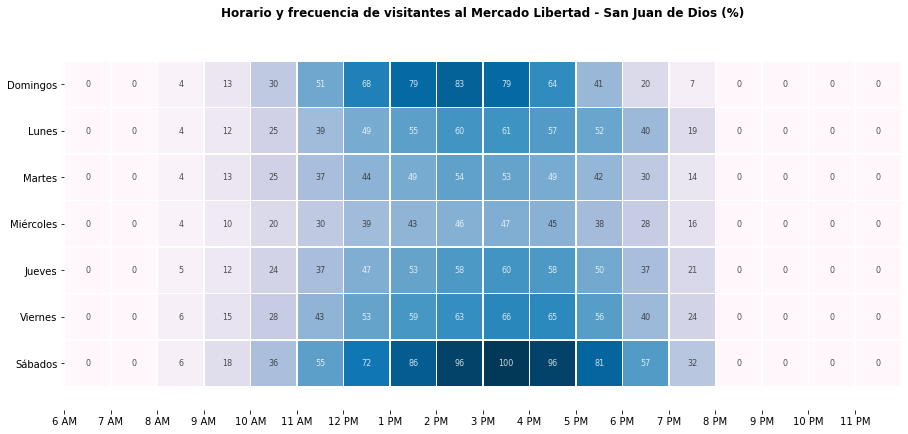

In [56]:
plt.figure(figsize=(15,7))
sns.heatmap(base, cmap='PuBu', linewidths=0.8, annot=True, annot_kws={'fontsize':8, 'alpha':0.8}, fmt='d', square=True,
           cbar=False)

plt.xticks(np.arange(18), list(base))
plt.title('Horario y frecuencia de visitantes al Mercado Libertad - San Juan de Dios (%)\n', weight='semibold')

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);
plt.show()

### Parece que en los días de semana es una mejor opción para visitar nuestro mercado 

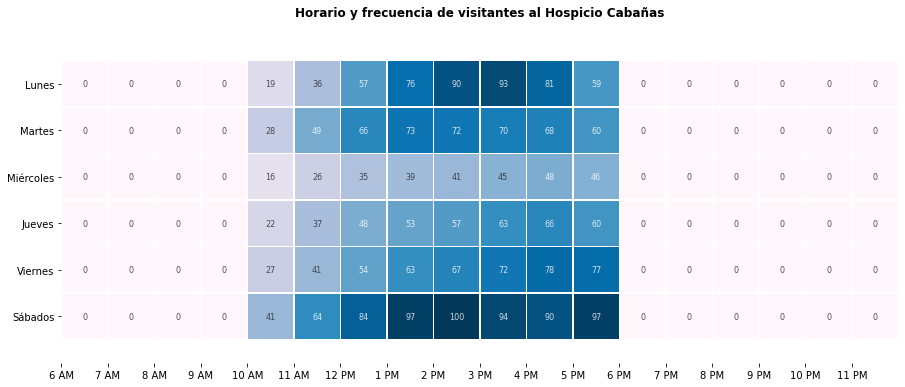

In [55]:
hospicio = visit_planner("Hospicio Cabañas")

hospicio.drop('Domingos', axis=0, inplace=True)

for hour in list(hospicio):
    hospicio[hour] = re.findall('...%.{0,20} '+str(hour), str(list(HL10[HL10.full_name=="Hospicio Cabañas"].hours)))
    hospicio[hour] = [ re.findall('\d+', str(i))[0] for i in hospicio[hour] ]
    hospicio[hour] = hospicio[hour].astype(int)

plt.figure(figsize=(15,7))
sns.heatmap(hospicio, cmap='PuBu', linewidths=0.8, annot=True, annot_kws={'fontsize':8, 'alpha':0.8}, fmt='d', square=True,
           cbar=False)

plt.xticks(np.arange(18), list(base))
plt.title("Horario y frecuencia de visitantes al Hospicio Cabañas\n", weight='semibold')

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t);
plt.show()

## Tambien podemos ver el mejor horario para visitar el Hospicio Cabañas, los días sábados no son una buena opción pero un miércoles en la mañana será un horario ideal para visitarlo

## Conclusiones

Desde el punto de vista de location intelligence para la gestión del destino turístico, las técnicas empleadas permiten identificar y localizar con toda claridad aquellos servicios, establecimientos y agentes interesados que contribuyen a mejorar la imagen y la competitividad de la ciudad de Guadalajara como destino turístico y gastronómico.

En el campo de las implicaciones gerenciales, los resultados generados utilizando Google Maps y Popular Times nos dan una opción éficaz para establecer acuerdos B2B para la mejora general de la calidad de los servicios y crear una experiencia de viaje envolvente unida a tecnologías de marketing de proximidad. Por otra parte, su aplicación también permite identificar la frecuencia en la cual los locales y/o atracciones son visitados, la competencia, su popularidad y los tópicos por los cuales son reconocidos en función de las recomendaciones de los usuarios.

Finalmente gracias a los resultados es posible aplicar estas técnicas a cualquier destino del mundo y a cualquier sector, por ejemplo conocer los horarios de congestionamientos en bancos, consultorios médicos, retail, etc, aunque es un requisito indispensable que el destino estudiado cuente con una presencia sustancial en Google Maps y que su afluencia de visitantes genere las interacciones suficientes para ser analizadas mediante la ciencia de datos.

## 👍👍 <center> <a href="https://www.linkedin.com/in/lealrlx/">Te invito a escribirme tus ideas, tus comentarios y sobre todo compartir tus opiniones🌍 </a> </center>##